#### backprop

In [1]:
import os 
from time import time
from random import uniform

import pandas as pd 
import numpy  as np 
import torch
import matplotlib.pyplot as plt 

import torch
import torch.nn as nn
import torch.optim as optim

from utils import load_mch
from utils.mch import MCHHandler

# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
wl = [i for i in range(660, 921, 10)]
%matplotlib inline

In [141]:
mch = MCHHandler()
def loss_func(pred, target):
    return torch.sqrt((pred - target)**2)

In [3]:
df, header, _ = mch._load_mch("output/old_mus/20190507_max_no_prism/mcx_output/20190507_max_no_prism_660.mch")

In [200]:
pathlength = df[df["detector_idx"]==2].iloc[:, 1:-1].values
pathlength = torch.tensor(pathlength).float()

target = torch.tensor([1.2e-8])

In [143]:
mua = torch.rand(5, 1, requires_grad=True)
# mua.requires_grad = True
mua.shape

torch.Size([5, 1])

In [212]:
for i in range(10000):
    pred = torch.exp(pathlength @ (-mua)).sum()
    loss = loss_func(pred, target)
    loss.backward()
    with torch.no_grad():
        mua -= 5e1 * mua.grad
        if i % 1000 == 0:
            print(i)
#             print("grad: ")
#             print(mua.grad)
#             print("mua: ")
#             print(mua)
            print(float(pred), float(target), float(loss.data))
        mua.grad.zero_()
    

0
2.624964068331792e-08 1.2000000104706032e-08 1.4249640578611888e-08
1000
1.9900713965625982e-08 1.2000000104706032e-08 7.90071386091995e-09
2000
1.6050913487219987e-08 1.2000000104706032e-08 4.050913382513954e-09
3000
1.3464052095457646e-08 1.2000000104706032e-08 1.4640519907516136e-09
4000
1.2001263094418846e-08 1.2000000104706032e-08 1.262989712813578e-12
5000
1.2001263094418846e-08 1.2000000104706032e-08 1.262989712813578e-12
6000
1.2001263094418846e-08 1.2000000104706032e-08 1.262989712813578e-12
7000
1.2001263094418846e-08 1.2000000104706032e-08 1.262989712813578e-12
8000
1.2001263094418846e-08 1.2000000104706032e-08 1.262989712813578e-12
9000
1.2001263094418846e-08 1.2000000104706032e-08 1.262989712813578e-12


In [198]:
loss

tensor([4.6398e-06], grad_fn=<SqrtBackward>)

In [202]:
pred.data, target

(tensor(0.0086), tensor([1.2000e-08]))

In [213]:
mua

tensor([[0.9677],
        [1.0810],
        [0.9137],
        [0.9504],
        [0.5133]], requires_grad=True)

In [126]:
target

tensor([1.2000e-08])

#### 跑WMC!!

In [22]:
idx = "20190510"
idx = os.path.join("configs", "live", idx)
max_no_prism = idx + "_max" + "_no_prism" + ".json"
max_prism = idx + "_max" + ".json"
min_no_prism = idx + "_min" + "_no_prism" + ".json"
min_prism = idx + "_min" + ".json"

In [5]:
mch = MCHHandler()

In [23]:
mch.load_config(max_no_prism)
s_max, r_max = mch.run_wmc(args)

In [24]:
mch.load_config(min_no_prism)
s_min, r_min = mch.run_wmc(args)

#### 各組織路徑長

In [26]:
r_max[0, :, 0]

array([2.81312881e-04, 4.25479346e-04, 3.76311038e-03, 8.88704672e-05,
       1.21633789e-07])

In [28]:
s_min.shape

(0,)

#### max/min相比

IndexError: too many indices for array

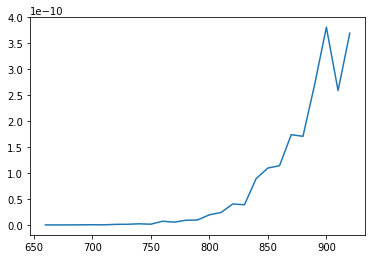

In [25]:
plt.plot(wl, s_max[0, 1, :])
plt.plot(wl, s_min[0, 1, :])

In [ ]:
for i in range(10, 20):
    print(i)
    plt.plot(wl, s_min[i, 1, :] - s_max[i, 1, :])
    plt.xlabel("wavelength [nm]")
    plt.ylabel("reflectance difference [-]")
    plt.grid()
    plt.show()

In [76]:
args[18]

{'skin': {'blood_volume_fraction': 0.6573422409108316,
  'ScvO2': 0.9164422353191374,
  'water_volume': 0.18706894400027183,
  'fat_volume': 0.12553608475146605,
  'melanin_volume': 0.030052730337430528,
  'collagen_colume': 0},
 'fat': {'blood_volume_fraction': 0,
  'ScvO2': 0,
  'water_volume': 0,
  'fat_volume': 1,
  'melanin_volume': 0,
  'collagen_colume': 0},
 'muscle': {'blood_volume_fraction': 0.01295883774275447,
  'ScvO2': 0.3251160326046738,
  'water_volume': 0.5687562108427497,
  'fat_volume': 0,
  'melanin_volume': 0,
  'collagen_colume': 0.41828495141449573},
 'ijv': {'blood_volume_fraction': 1,
  'ScvO2': 0.6721744694735597,
  'water_volume': 0,
  'fat_volume': 0,
  'melanin_volume': 0,
  'collagen_colume': 0},
 'cca': {'blood_volume_fraction': 1,
  'ScvO2': 0.834630804823658,
  'water_volume': 0,
  'fat_volume': 0,
  'melanin_volume': 0,
  'collagen_colume': 0}}

In [16]:
# mch.mch_list[0]
d, head, _ = mch._load_mch(mch.mch_list[0])

In [17]:
d.groupby("detector_idx").mean()

,media_0,media_1,media_2,media_3,media_4,angle
detector_idx,,,,,,
1.0,18.525242,20.228548,97.803684,75.587893,1.959802,-0.692664
2.0,19.178288,21.642902,119.692321,96.181711,3.198013,-0.691573
3.0,19.784837,22.872857,138.411629,114.629783,4.189438,-0.692507


#### 活體光譜

In [32]:
# df = pd.read_csv("data/calibrated/20190507/IJV/20190507_1_1.csv")
df = pd.read_csv("data/calibrated/20190510/IJV/20190510_1_1.csv")
df.head(1)

,wavelength,max,min
0,660,2.490885e-10,2.431567e-10


#### 比較波型和強度

#### 未加凌鏡

In [20]:
# IJV舒張
loss = 100
for i, s in enumerate(s_min):
    if np.sqrt((s[1,:]-df["max"])**2).mean()/df["max"].mean() < loss:
        loss = np.sqrt((s[1, :] - df["max"])**2).mean()/df["max"].mean()
        print("num: {} | loss: {}".format(i, loss))

        plt.plot(wl, s[1, :], label="simulated spectra") 
        plt.plot(wl, df["max"], label="measured spectra")
        plt.xlabel("wavelength [nm]")
        plt.ylabel("reflectance [-]")
        plt.legend()
        plt.grid()
        plt.show()

In [144]:
# args[19437]

num: 0 | loss: 0.9593468625194087


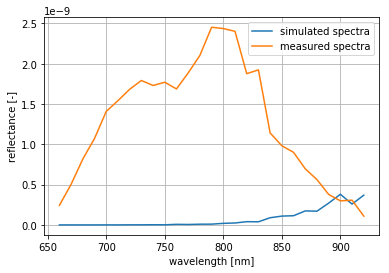

num: 1 | loss: 0.9514394750809558


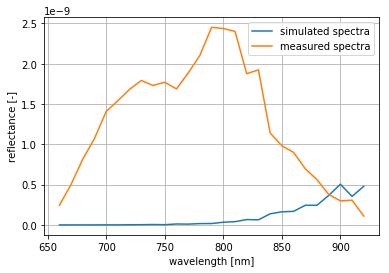

num: 25 | loss: 0.9491576009825111


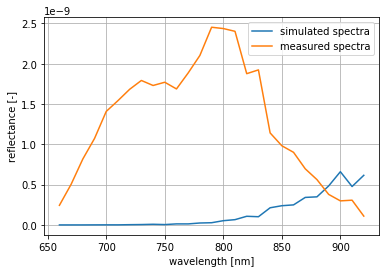

num: 1242 | loss: 0.9488878581218396


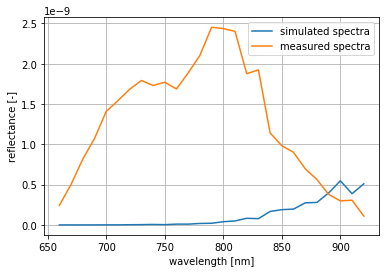

num: 1809 | loss: 0.9474461205650593


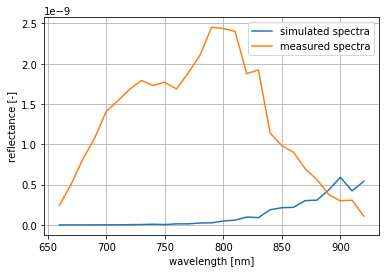

num: 9310 | loss: 0.9473595560001549


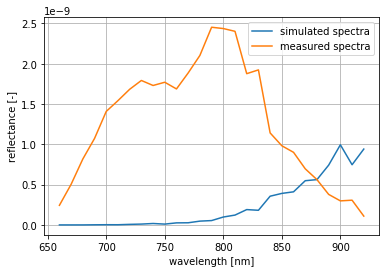

num: 11002 | loss: 0.946279442284523


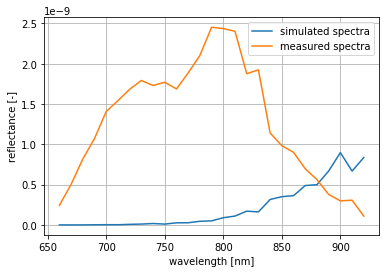

num: 26057 | loss: 0.9462751576140374


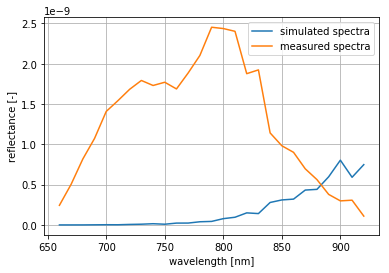

num: 44319 | loss: 0.9451582956782186


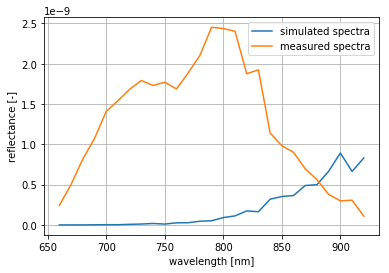

In [33]:
# IJV收縮
loss = 100
for i, s in enumerate(s_max):
    if np.sqrt((s[1,:]-df["min"])**2).mean()/df["min"].mean() < loss:
        
        loss = np.sqrt((s[1, :] - df["min"])**2).mean()/df["min"].mean()
        print("num: {} | loss: {}".format(i, loss))
        
        plt.plot(wl, s[1, :], label="simulated spectra") 
        plt.plot(wl, df["min"], label="measured spectra")
        plt.xlabel("wavelength [nm]")
        plt.ylabel("reflectance [-]")
        plt.legend()
        plt.grid()
        plt.show()

In [34]:
args[20779], args[26119]
args[100]
args[44319]

{'skin': {'blood_volume_fraction': 0.09937544884354167,
  'ScvO2': 0.9044671082751585,
  'water_volume': 0.48783313420662183,
  'fat_volume': 0.22241940532271337,
  'melanin_volume': 0.19037201162712314,
  'collagen_colume': 0},
 'fat': {'blood_volume_fraction': 0,
  'ScvO2': 0,
  'water_volume': 0,
  'fat_volume': 1,
  'melanin_volume': 0,
  'collagen_colume': 0},
 'muscle': {'blood_volume_fraction': 0.09592474541998697,
  'ScvO2': 0.18970486873634648,
  'water_volume': 0.13264867851510012,
  'fat_volume': 0,
  'melanin_volume': 0,
  'collagen_colume': 0.7714265760649129},
 'ijv': {'blood_volume_fraction': 1,
  'ScvO2': 0.7732676942153168,
  'water_volume': 0,
  'fat_volume': 0,
  'melanin_volume': 0,
  'collagen_colume': 0},
 'cca': {'blood_volume_fraction': 1,
  'ScvO2': 0.518405853988795,
  'water_volume': 0,
  'fat_volume': 0,
  'melanin_volume': 0,
  'collagen_colume': 0}}

num: 0 | loss: 0.7827952622796575


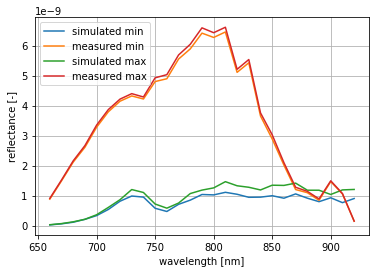

num: 1 | loss: 0.750364279447127


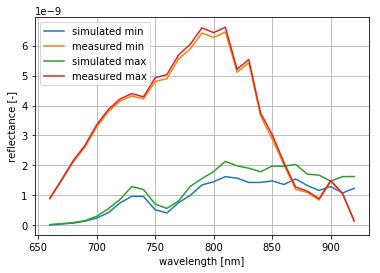

num: 2 | loss: 0.5372284036237347


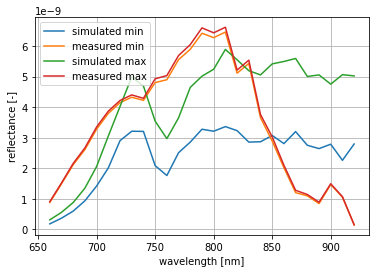

num: 65 | loss: 0.49813501461279586


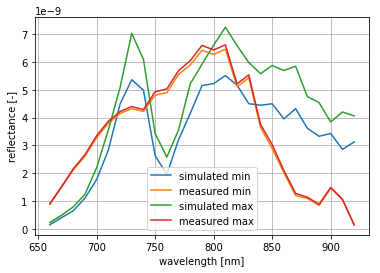

num: 68 | loss: 0.47228202448570955


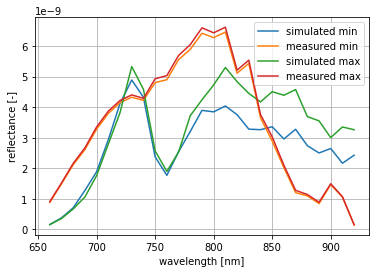

num: 85 | loss: 0.4629630284505286


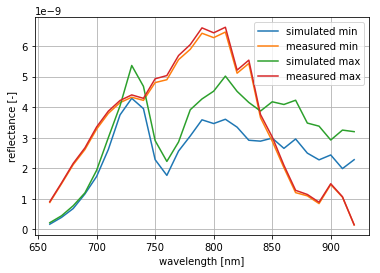

num: 92 | loss: 0.45321458794712577


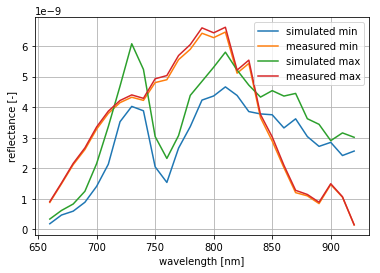

num: 100 | loss: 0.43167718605957756


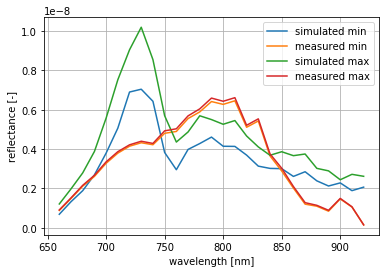

num: 241 | loss: 0.415746747447837


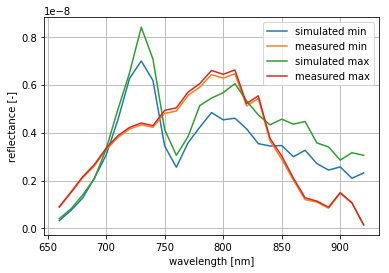

num: 735 | loss: 0.41183924087015256


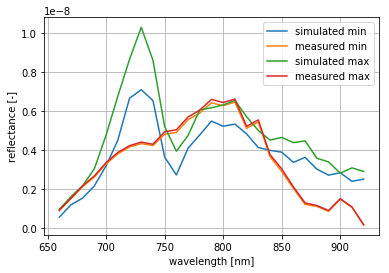

num: 804 | loss: 0.39343421660085187


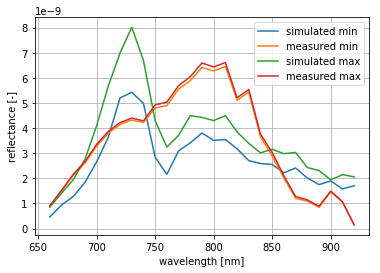

num: 6950 | loss: 0.3919999260775165


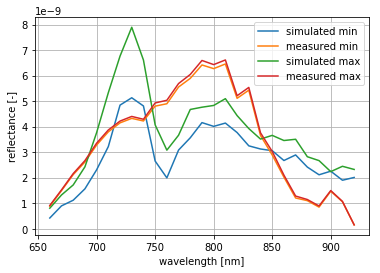

num: 13791 | loss: 0.39152211682113797


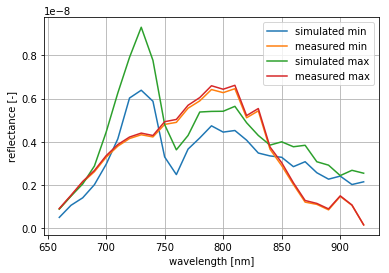

num: 31322 | loss: 0.3911840386797568


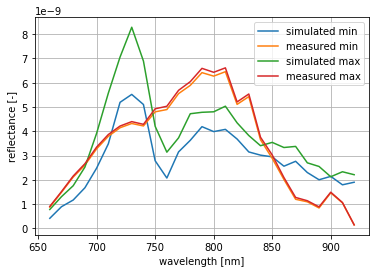

num: 31926 | loss: 0.3904398945606099


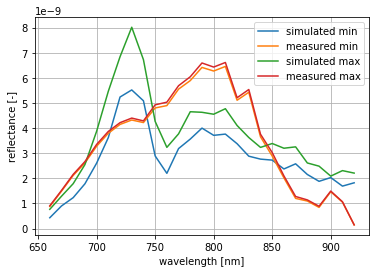

num: 39404 | loss: 0.3895816963585762


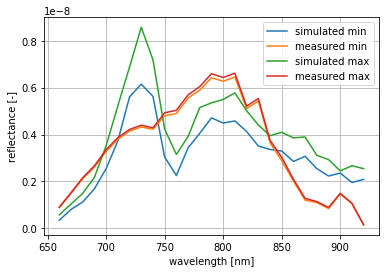

In [116]:
# 一起比較
loss = 100
for i, (smax, smin) in enumerate(zip(s_max, s_min)):
    loss_ = (np.sqrt((smax[1,:]-df["min"])**2).mean()/df["min"].mean() + \
             np.sqrt((smin[1,:]-df["max"])**2).mean()/df["max"].mean()) / 2
    if loss_ < loss:
        
        loss = loss_
        print("num: {} | loss: {}".format(i, loss))
        
        plt.plot(wl, smax[1, :], label="simulated min") 
        plt.plot(wl, df["min"], label="measured min")
        
        plt.plot(wl, smin[1, :], label="simulated max") 
        plt.plot(wl, df["max"], label="measured max")
        
        plt.xlabel("wavelength [nm]")
        plt.ylabel("reflectance [-]")
        plt.legend()
        plt.grid()
        plt.show()

In [146]:
# args[39404]